<a href="https://colab.research.google.com/github/Ashishvijayraj/data-science/blob/main/Ashish_Vijay_Raj_Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
# Import the dataset
df = pd.read_csv("Boston_Test.csv")
df = pd.read_csv("Boston_Train.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [ ]:
df.rename(columns={'medv':'Price'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  351 non-null    int64  
 1   crim        351 non-null    float64
 2   zn          351 non-null    float64
 3   indus       351 non-null    float64
 4   chas        351 non-null    int64  
 5   nox         351 non-null    float64
 6   rm          351 non-null    float64
 7   age         351 non-null    float64
 8   dis         351 non-null    float64
 9   rad         351 non-null    int64  
 10  tax         351 non-null    int64  
 11  ptratio     351 non-null    float64
 12  black       351 non-null    float64
 13  lstat       351 non-null    float64
 14  Price       351 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 41.3 KB


In [ ]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,175.000000,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,101.469207,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,87.500000,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,175.000000,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,262.500000,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,350.000000,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [ ]:
corr = df.corr()
corr.shape

(15, 15)

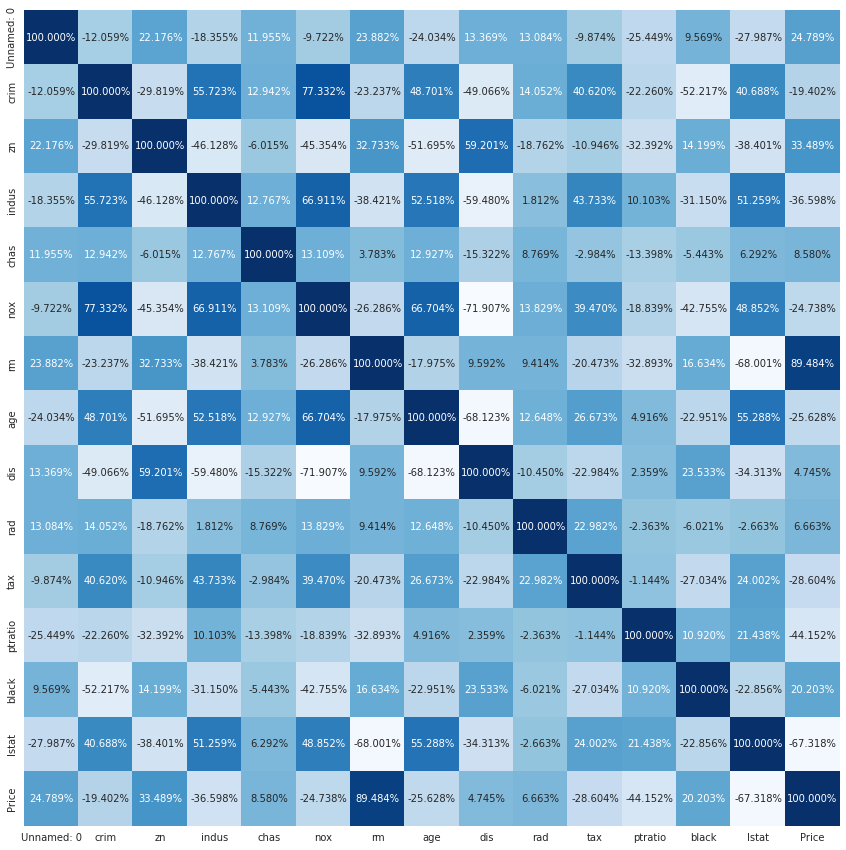

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=False, square= True, fmt='.3%', annot=True, cmap='Blues')

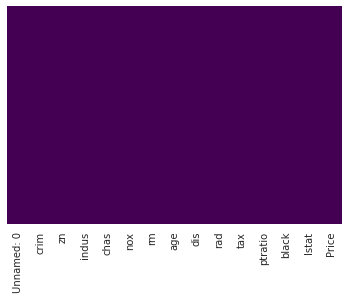

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

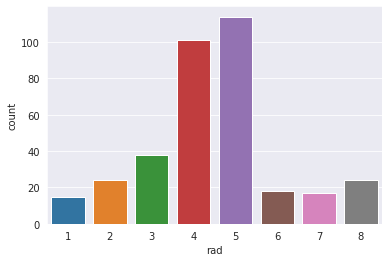

In [ ]:
import seaborn as sns 
sns.set_style('darkgrid')
sns.countplot(x='rad',data=df)

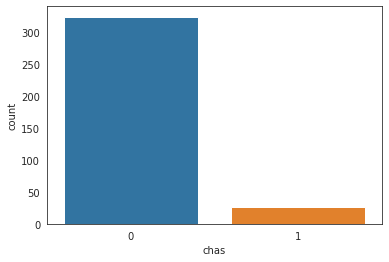

In [ ]:
sns.set_style('white')
sns.countplot(x='chas',data=df)

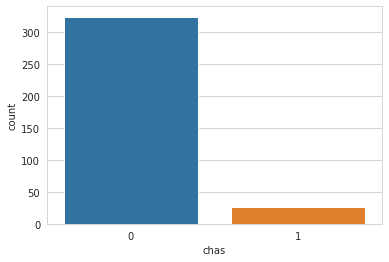

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='chas',data=df)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [ ]:
y = np.round(df["Price"])
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores
print(featureScores.nlargest(5,'Score'))

         Specs        Score
2           zn  3360.496357
0   Unnamed: 0  2600.156234
7          age  1575.417982
10         tax   932.795817
3        indus   426.640225


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()


In [ ]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [ ]:
y = np.round(df['Price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,Unnamed: 0,2600.156234
1,crim,116.409048
2,zn,3360.496357
3,indus,426.640225
4,chas,33.428537
5,nox,2.280787
6,rm,20.688799
7,age,1575.417982
8,dis,44.701259
9,rad,23.356787


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

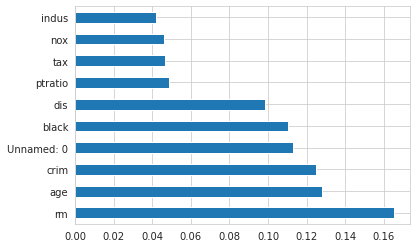

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
x = df.iloc[:,[-1,5,10,4,9]]
y = df.iloc[:,[-1]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=0)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg  = RandomForestRegressor()
reg.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [ ]:
y_pred = reg.predict(x_train)
print("Training Accuracy:", reg.score(x_train,y_train)*100)

Training Accuracy: 99.99499499415305


In [ ]:
print("Testing Accuracy:", reg.score(x_test,y_test)*100)

Testing Accuracy: 99.98041837496031


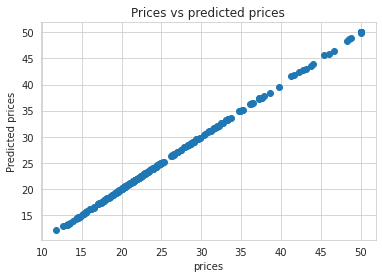

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs predicted prices")
plt.show()